<a href="https://colab.research.google.com/github/slmayfield/Artificial_Neural_Network_project/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Decision Tree Grid Search
## DTSC 680: Applied Machine Learning

## Name: Shelby Mayfield


## Directions

The main purpose of this assignment is for you to gain experience creating and visualizing a Decision Tree along with sweeping a problem's parameter space - in this case by performing a grid search.  Doing so allows you to identify the optimal hyperparameter values to be used for training your model.

## Preliminaries

Let's import some common packages:

In [ ]:
import numpy as np
from sklearn import datasets

## Load and Split Iris Data Set

Complete the following:

1. Load the `Iris` data set by calling the [load_iris()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) function of the `datasets` library from `sklearn` - name the dictionary that is returned `iris`.

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 40% and a `random_state` of `0`.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively. (Be sure to import the `train_test_split()` function first.)

NOTE: you will need to use the ENTIRE dataset for this assignment, not just the first two columns.

In [ ]:
# This step I am importing load_iris from sklearn #
from sklearn.datasets import load_iris

#This step imports the train_test_split() function from sklearn.model_selection#
from sklearn.model_selection import train_test_split

#This step, I am loading the iris data set by calling the load_iris() function of the datasets library from sklearn. The name of the dictionary is iris#
iris=load_iris()

In [ ]:
#This confirms that the dataset, Iris, runs accordingly. #
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
#Since the entire dataset is being used for this assignment, I am not including any parameters of petal length or width. This step is for x and y values#
x=iris.data
y=iris.target

In [ ]:
#This confirms that the dataset, Iris x values, runs accordingly. #
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
#This confirms that the dataset, Iris y values, runs accordingly. #
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#This step calls the train_test_split() with a test_size of 40% and a random_state of 0. The output is saved into X_train, X_test, y_train, and y_test, respectively. #
X_train, X_test, y_train, y_test=train_test_split( x, y, test_size= 0.4, random_state = 0)

In [ ]:
#This confirms that the dataset, Iris x_train values, runs accordingly. #
X_test

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.6, 1.4, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2

In [ ]:
#This confirms that the dataset, Iris y_train values, runs accordingly. #
y_train

array([1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

In [ ]:
#This confirms that the dataset, Iris y_test values, runs accordingly. #
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2])

In [ ]:
#This confirms that the dataset, Iris X_train values, runs accordingly. #

X_train

array([[6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.9, 3.1, 4.9, 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.6, 3.4, 1.4, 0.3],
       [6.2, 2.2, 4.5, 1.5],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [4.8, 3. , 1.4, 0.1],
       [7.1, 3. , 5.9, 2.1],
       [6.9, 3.2, 5.7, 2.3],
       [6.5, 3. , 5.8, 2.2],
       [6.4, 2.8, 5.6, 2.1],
       [5.1, 3.8, 1.6, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [6.5, 3.2, 5.1, 2. ],
       [6.7, 3.3, 5.7, 2.1],
       [4.5, 2.3, 1.3, 0.3],
       [6.2, 3.4, 5.4, 2.3],
       [4.9, 3. , 1.4, 0.2],
       [5.7, 2

## Create a Single Decision Tree

Complete the following:

(Cell 1:)
1. Import the `DecisionTreeClassifier` class from the `sklearn.tree` library
2. Create a DecisionTreeClassifier object called `tree_clf` with a `random_state` of `42`
3. Fit the DecisionTreeClassifier object on the training data.

(Cell 2:)

4. Make a prediction on the test data, and name the predicted values output by the model `preds`.
5. Compute the performance of the model by measuring the accuracy score on the test set.  You must import the [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function from the `sklearn.metrics` library.  Name the accuracy score value you compute `acc_score`.
6. Print the accuracy score to the screen.


In [ ]:
 #This imports the DecisionTreeClassifier class from the sklearn.tree library#
 from sklearn.tree import DecisionTreeClassifier

In [ ]:
#This creates a DecisionTreeClassifier object called tree_clf with a random_state of 42#
tree_clf=DecisionTreeClassifier(random_state=42)


In [ ]:
#This step fits the DecisionTreeClassifier object on the training data#
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#This step will import the acc_score from sklearn.metrics#
from sklearn.metrics import accuracy_score

In [ ]:
#This will make a prediction on the test data, and name the predicted values output by the model preds based on X_test#
preds=tree_clf.predict(X_test)

In [ ]:
#This will compute the performance of the model by measuring the accuracy score on the test set#
acc_score=accuracy_score(y_test,preds)

In [ ]:
#Here, I am printing the accuracy score to the screen#
print('Accuracy=%s' % (acc_score))

Accuracy=0.95


## Perform Grid Search

Complete the following:

(Cell 1:)
1. Import the `GridSearchCV` class from the `sklearn.model_selection` library.
2. Create a dictionary called `param_grid` with three key-value pairs.  The keys are `max_depth`, `max_leaf_nodes` and `min_samples_split`, and their respective values are `[2,3,4,5,8,16,32]`, `list(range(2, 20, 1))` and `[2,3,4,5,8,12,16,20]`.
3. Instantiate an object of the `GridSearchCV` class called `grid_search_cv`.  Pass the following as input to the constructor:
    - The model to be used. Use a `DecisionTreeClassifier` with a `random_state` parameter of `42`.
    - The paramter grid.
    - The hyperparameter `verbose=1`. (Look this up.)
    - The number of cross-folds. Specify `cv=3`.
    
    
4. Call the `fit()` method to perform the grid search using 3-fold cross-validation.
5. Print the best parameters identified by the grid search using the `best_params_` attribute of the GridSearchCV object.

(Cell 2:)

6. Compute the predicted values `y_pred` using the test set `X_test`.
7. Calculate the accuracy, precision, and recall scores using the `accuracy_score()`, `precision_score()`, and `recall_score()` functions.  Call these `acc_score`, `prec_score`, and `recall_score`, respectively. Set the average parameter to `micro` when calculating precision and recall to account for multiple classes.
8. Print all three scores to the screen.

In [ ]:
#This imports GridSearchCV class from the sklearn.model_selection library#
from sklearn.model_selection import GridSearchCV


In [ ]:
#A dictionary classed, called param_grid, with three key=value pairs will be created. The key: max_depth, max_leaf, and min_samples_split, with their respective values are [2,3,4,5,8,16,32], list(range(2, 20, 1)) and [2,3,4,5,8,12,16,20]#

param_grid={'max_depth':[2,3,4,5,8,16,32],
            'max_leaf_nodes': list(range(2, 20, 1)),
            'min_samples_split':[2,3,4,5,8,12,16,20]}

#This will display the param_grid dictionary#
param_grid

{'max_depth': [2, 3, 4, 5, 8, 16, 32],
 'max_leaf_nodes': [2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19],
 'min_samples_split': [2, 3, 4, 5, 8, 12, 16, 20]}

In [ ]:
#Instantiate an object of the GridSearchCV class called grid_search_cv. Pass the following as input to the constructor#
#The model to be used. Use a DecisionTreeClassifier with a random_state parameter of 42.#
#verbose=1 means that the output is not silent and has specific output#

grid_search_cv = GridSearchCV( DecisionTreeClassifier(random_state=42), param_grid,verbose=1,cv=3)

#This will display the grid_search_cv#
grid_search_cv


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 8, 16, 32],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4, 5, 8, 12, 16, 20]},
             verbose=1)

In [ ]:
#Call the fit() method to perform the grid search using 3-fold cross-validation.#
grid_search_cv.fit(X_train, y_train)

#This will display the grid_search_cv#
grid_search_cv

Fitting 3 folds for each of 1008 candidates, totalling 3024 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 8, 16, 32],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4, 5, 8, 12, 16, 20]},
             verbose=1)

In [ ]:
#This prints the best parameters with the grid_search_cv.best_paramas_#
print("Best parameters: ", grid_search_cv.best_params_)

Best parameters:  {'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_split': 2}


In [ ]:
#This is importing the three scores needed for the following portion of the assignment; Accuracy, Precision, and Recall#
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
#Compute the predicted values y_pred using the test set X_test.#
y_pred=grid_search_cv.predict(X_test)

#This is displaying the y_pred output#
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2])

In [ ]:
#Calculate the accuracy, precision, and recall scores using the accuracy_score(), precision_score(), and recall_score() functions.#
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.8666666666666667

In [ ]:
#Call these acc_score, prec_score, and recall_score, respectively.#
#average='micro' is being used for
prec_score = precision_score(y_test, y_pred, average='micro')
prec_score

0.8666666666666667

In [ ]:
# Set the average parameter to micro when calculating precision and recall to account for multiple classes.#
recall_score = recall_score(y_test, y_pred, average='micro')
recall_score

0.8666666666666667

In [ ]:
#Print all three scores to the screen.#

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (prec_score))
print('Recall=%s' % (recall_score))

Accuracy=0.8666666666666667
Precision=0.8666666666666667
Recall=0.8666666666666667


## Visualize Optimal Decision Tree as Text

Instantiate a new `DecisionTreeClassifier` object, and use the `best_params_` attribute of the `grid_search_cv` object to specify the best `max_depth`, `max_leaf_nodes` and `min_samples_split` values calculated from the grid search along with a `random_state` of `42`.  Retrain the "optimal" (for the few parameters that we swept) decision tree.

Next, use the [tree.export_text()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html) method to visualize the "optimal" decision tree.  This function takes a trained classifier as its first parameter, and a set of feature names as its second parameter (the feature names are included in the `iris` dictionary returned from the `load_iris()` function).  The result is a text based visualization of the decision tree.  Note that this method returns a string, so you'll want to `print()` the result to get it to look right.

In [ ]:
#Part one of this section, creating DecisionTreeClassifer object and using the best_params_ attribute of the grid_search_cv object#
best_params = grid_search_cv.best_params_
optimal_tree_decision = DecisionTreeClassifier(
    max_depth=best_params["max_depth"],
    max_leaf_nodes=best_params["max_leaf_nodes"],
    min_samples_split=best_params["min_samples_split"],
    random_state=42)
best_params


{'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_split': 2}

In [ ]:
optimal_tree_decision.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, random_state=42)

In [ ]:
#This allows the export_text to be imported from sklearn#
from sklearn.tree import export_text


In [ ]:
#Using the tree.export_text() to visualize the "optimal" decision tree.#
optimal_tree_decision_export = export_text(optimal_tree_decision, feature_names=iris['feature_names'])
print(optimal_tree_decision_export)

|--- petal length (cm) <= 2.35
|   |--- class: 0
|--- petal length (cm) >  2.35
|   |--- petal length (cm) <= 5.05
|   |   |--- class: 1
|   |--- petal length (cm) >  5.05
|   |   |--- class: 2



## Visualize Optimal Decision Tree as Image

Use the `tree.plot_tree()` method to visualize the "optimal" decision tree, which takes a trained classifier as its only parameter and returns a graphical visualization of the decision tree. Use `filled=True` as an argument to the method to add color to the image.

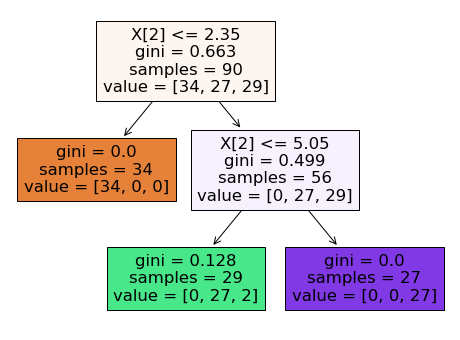

In [ ]:
#Use the tree.plot_tree() method to visualize the "optimal" decision tree, which takes a trained classifier as its only parameter and returns a graphical visualization of the decision tree. #
#Use filled=True as an argument to the method to add color to the image.#
#I used figsize=(8,6) as my sizes as the decision trees intro part 1 quiz example did.#
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plot_tree(optimal_tree_decision, filled=True);
plt.show()


## Critical Analysis

1. In your own words (a sentence or two) explain what setting the GridSearchCV hyperparameter `verbose` to `1` does. Please provide a citation. (A link to the website or the name of the book where you found this answer will suffice.)

2. In your own words, describe or interpret the role of the gini score criterion in the decision tree algorithm. How does this compare to the entropy impurity measure? Finally, sklearn uses the CART (Classification and Regression Tree) algorithm to train Decision Trees. How does this algorithm determine the feature and threshold value to use for splitting at each step of the Decision Tree algorithm? It may be helpful to look at outside resources to help you answer these questions (The YouTube channel ["StatQuest"](https://youtu.be/7VeUPuFGJHk) has some excellent videos on Decision Trees for those of you that like visual explanations.)

Make sure that you answer all the questions above. I am looking for **meaningful content** here that **goes into detail**. Don't just copy from the textbook or rush through answering this question.

1) GridsearchCV is a library function of sklearn’s model_selection package to help loop predefined hyperparameters and fit the model onto the training set. Having the verbose of 1 would allow the training process to have specific output that best fits what the coder wants and will include an animated progress bar. When the verbose is 0, it will be silent, there will not be any additional output while the model is being trained.

2) The gini score criterion measures the randomness or impuirty in the values of the dataset for the decision tree. Entropy is a measurement of disorder or uncertainty in the system, where 0 is no disorder and 1 is a high disorder. The gini index impacts the model based on the amount of impurity in the system. The number of root nodes and leaf nodes are designed to be decreaed by the gini index. The decision tree is very specific on the variable and when to split between the classes in the data by following steps to optimize the data split. Each threshold is calulated in relation to the data split for each input variable. Selecting the best way to split the model can be conducted by selecting random values within the range of each variable or selecting a threshold by max, min, or average.

Citations:

Dash, S. (2022, November 2). Decision trees explained - entropy, information gain, Gini Index, CCP pruning.. Medium. Retrieved January 13, 2023, from https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c

Singh, S. (2020, September 10). Under the Hood - decision tree. Medium. Retrieved January 13, 2023, from https://towardsdatascience.com/under-the-hood-decision-tree-454f8581684e


Team, G. L. (2022, June 13). Hyperparameter tuning with GRIDSEARCHCV. Great Learning Blog: Free Resources what Matters to shape your Career! Retrieved January 12, 2023, from https://www.mygreatlearning.com/blog/gridsearchcv/



## Ungraded Critical Thinking Question

Compare the accuracy score from the first Decision Tree to the accuracy score after you performed the grid search. How does it differ? It is most likely that you will find the accuracy score has decreased. Is that what you had expected? We perform a round of grid searching in order to elucidate the optimal hyperparameter values. Why, then, has the accuracy score decreased? Most importantly, what caused this decrease in the accuracy score and why? Explain your answer.

The accuracy score from the first Decision Tree was: 0.95 and the accuracy score post grid search was 0.867. This shows that the accuracy did decrease and this differ could have been caused by the gridsearch using the predicted and training values to calculate the accuracy. It is possible that the gridsearch is not using the most "optimal" hyperparameter values as the first decision tree used. This would be due to the fact that the first decision tree uses only the values of the Iris data and not the predicted values.
I did not expect that the two values would almost have a 10 percent difference when doing the gridsearch. I initally thought that the values would have under 5 percent difference due to the optimization parameters, but it would makes sense that it varies.